## <center> ECSE 415 - Intro to Computer Vision </center>
### <center> Assignment 3</center> <center> Saima Haneef - 260744058 </center>

In [1]:
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np
import random

## 1. Segmentation

### 1.1 K-Means Clustering

#### 1.1.1 Implement the K-means clustering algorithm using only the numpy library. You can use opencv and matplotlib libraries only to read and display images but not for clustering

#### 1.1.2 Apply K-means to segment the image using [R,G,B] features. (R,G,B) represents color channels normalized between 0 and 1.

#### 1.1.3 Display the resulting segmented images for the first 10 iterations

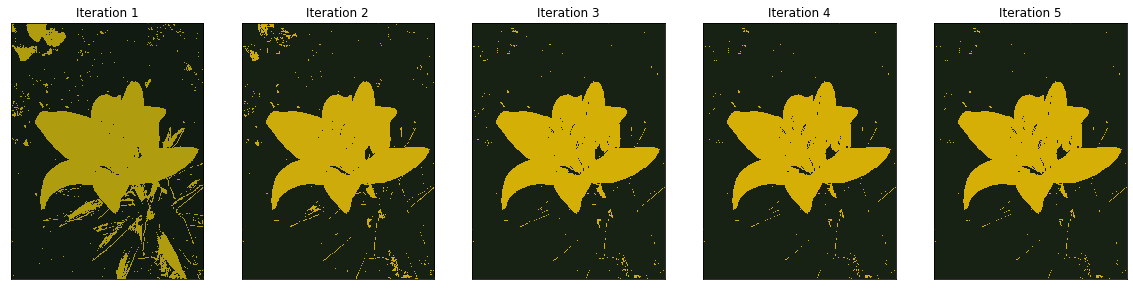

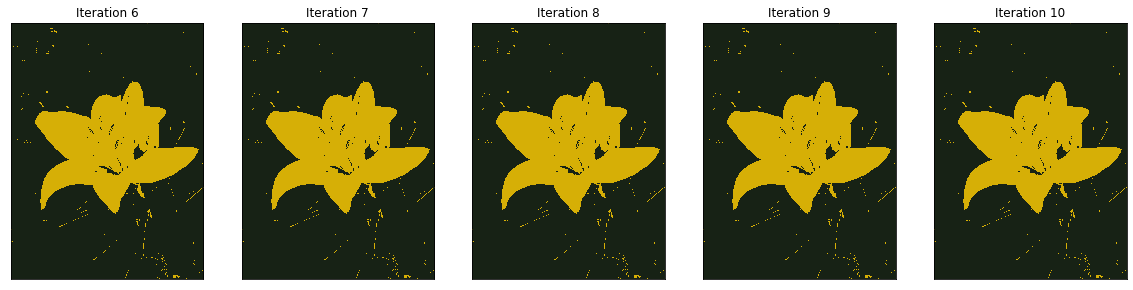

<Figure size 1440x1440 with 0 Axes>

In [2]:
img = cv2.cvtColor(cv2.imread("yellowlily.png"), cv2.COLOR_BGR2RGB)
z = img.reshape((-1,3))

# convert to np.float32
z = np.float32(z)
z = z/255.0
k = 2
centers = [[]]
distance = []
temp = [] 

centers = np.random.uniform(low=0, high=1, size=(k,3))

# print(centers)
# for n in range(0,2):
# #     print((img[random.randint(0, (img.shape[0])-1), random.randint(0, (img.shape[1])-1)]))
#     centers.insert(n,(z[random.randint(0, (z.shape[0])-1)]))
# del centers[-1]

n = 0
plt.figure(figsize=(20, 20))
for m in range(0,10):
    i=0
    distance = np.array([])
    label = []
    for x in range(0, z.shape[0]):
        while(i<2):
            ans = (np.linalg.norm(z[x]-centers[i]))
            distance = np.append(distance, ans)
            i+=1
    #     print(distance)

        indx = (np.argmin(distance))
    #         print(indx)

        label.append(indx)
    #         print(label)
        distance = np.array([])
        i = 0

    for x in range(0,k):
        temp = []
        for l, i in zip(label, z):
            if l == x:
                temp.append(i)
        centers[x] = np.mean(temp, axis = 0)

    centerscopy = centers.copy()
    centerscopy = centerscopy*255.0
    center = np.array(centerscopy)
    center = np.uint8(center)
    label = np.array(label)
    label = label.transpose()
    out = center[label.flatten()]
    out = out.reshape((img.shape))
    plt.title("Iteration " + str(m)), plt.xticks([]), plt.yticks([])

    plt.subplot(151+n%5)
    plt.imshow(out)

    n = n + 1 
    if (n%5 ==0 and n!=0):
        plt.title("Iteration " + str(m+1)), plt.xticks([]), plt.yticks([])
        plt.show()
        plt.figure(figsize=(20, 20))


        

### 1.2 Expectation Maximization - Gaussian Mixture Models

#### 1.2.1 Implement the EM algorithm using only the numpy library. You can use opencv and matplotlib libraries only to read and display images but not for the overall EM algorithm.

#### 1.2.2 Apply GMM to the provided image using the [R,G,B] features. (R,G,B) represents color channels normalized between 0 and 1.

#### 1.2.3 Display the resulting segmented images for the first 10 iterations.

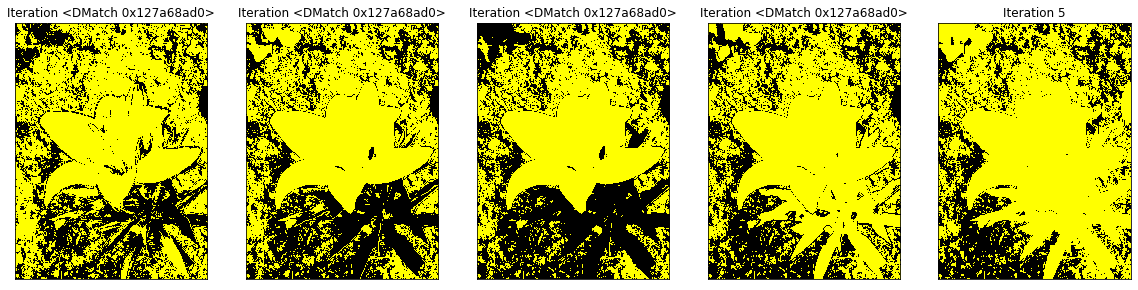

KeyboardInterrupt: 

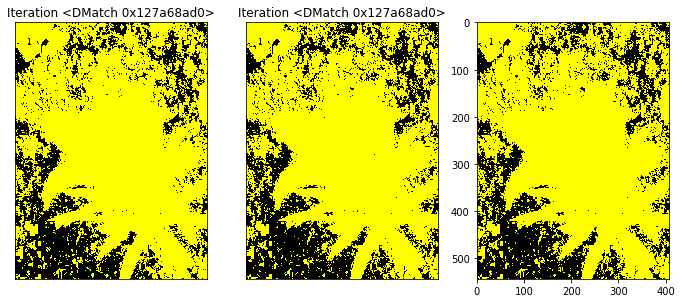

In [48]:
def gaussian(z, mean, cov):
    arr = []
    for i in z:
        val = (i-mean)
        val = val[:, np.newaxis]
        inv = np.linalg.inv(cov)
        temp = val.T
        total = np.dot(temp,inv)
        tmp = np.dot(total,val)
        exp = math.exp(-0.5*tmp)
        prob = (1/((((2*math.pi))**(3/2))*math.sqrt(np.linalg.det(cov))))*exp
        arr.append(prob)
#     print(np.max(arr))
    return arr

def expectation(z, mean, cov, weight, label):
    label=[]
    arr = []
    newarr = []
    cluster1 = []
    cluster2 = []
    prob1 = []
    prob2 = []
    cluster1 = []
    cluster2 = []
    for i in range(0,k):
#         print("mean")
#         print(mean[i])
#         print(cov[i])
        gauss = gaussian(z, mean[i], cov[i])
        temp = np.sum(gauss)*weight[i]
        arr.append(temp)
    denom = np.sum(arr)
#     print(denom)
    for i in range(0,k):
        gauss2 = gaussian(z, mean[i], cov[i])
        temp2 = (gauss2*weight[i])
        temp2 = temp2/denom
        newarr.append(temp2)
    newarr = np.array(newarr)
#     print("k")
#     print(newarr.shape)
#     print(np.max(newarr[0]))
#     print(newarr.shape[1])
    for x in range(0,newarr.shape[1]):
        if newarr[0][x]>newarr[1][x]:
            cluster1.append(z[x])
            prob1.append(newarr[0][x])
            label.append(0)
        else:
            cluster2.append(z[x])
            prob2.append(newarr[1][x])
            label.append(1)
#     cluster1 = np.array(cluster1)
#     cluster2 = np.array(cluster2)

#     print(cluster1.shape)
#     print(cluster2.shape)
    label = np.array(label)
    return label, prob1, prob2, cluster1, cluster2


def maximization(prob1, prob2, cluster1, cluster2):
    weight = np.random.uniform(low=0, high=1, size=(k,1))
    mean = np.random.uniform(low=0, high=1, size=(k,3))
#     cov = np.random.uniform(low=0, high=1, size=(k,3))

    cov = [[]]
    weight[0] = np.sum(prob1)/len(prob1)
    weight[1] = np.sum(prob2)/len(prob2)
#     print("o")
#     print(weight)

    total1 = 0
    for x in range(0, len(cluster1)):
        val1 = cluster1[x]*prob1[x]
        total1 = total1 + val1
    mean[0] = total1/np.sum(prob1)

    total2 = 0
    for x in range(0, len(cluster2)):
        val2 = cluster2[x]*prob2[x]
        total2 = total2 + val2
    mean[1] = total2/np.sum(prob2)
#     print(mean)
    
    sumcov = 0
    for x in range(0, len(cluster1)):
        val3 = cluster1[x] - mean[0]
        val3 = val3[:, np.newaxis]
        tmp = np.dot(val3,val3.T)
        tmp = tmp*prob1[x]
        sumcov = sumcov + tmp
    sumcov = sumcov/np.sum(prob1)

    cov.append(sumcov)
    
    sumcov1 = 0
    for x in range(0, len(cluster2)):
        val4 = cluster2[x] - mean[1]
        val4 = val4[:, np.newaxis]
        tmp1 = np.dot(val4,val4.T)
        tmp1 = tmp1*prob2[x]
        sumcov1 = sumcov1 + tmp1
    sumcov1 = sumcov1/np.sum(prob2)
    cov.append(sumcov1)
    cov.pop(0)
    return weight, mean, cov


### Initialization
img = cv2.cvtColor(cv2.imread("yellowlily.png"), cv2.COLOR_BGR2RGB)
z = img.reshape((-1,3))

z = np.float32(z)

centers = [[]]
for n in range(0,2):
    centers.insert(n,(z[random.randint(0, (z.shape[0])-1)]))
del centers[-1]
centers = np.array(centers)

i=0
distance = np.array([])
label = []
for x in range(0, z.shape[0]):
    while(i<2):
        ans = (np.linalg.norm(z[x]-centers[i]))
        distance = np.append(distance, ans)
        i+=1
    indx = (np.argmin(distance))
    label.append(indx)
    distance = np.array([])
    i = 0
# initializations
label = np.asarray(label)
label = label[:, np.newaxis]
mean = centers
weight = [1/k, 1/k]


cov = [[]]
for y in range(0,k):
    sum = 0
    for x in range(0, label.shape[0]):
        val = (z[x]-mean[y])
        val = val[:, np.newaxis]
        temp = val.T
        tmp = np.dot(val, temp)
        sum = sum + tmp
    sum = sum/(label.shape[0])
    cov.append(sum)
cov.pop(0)


k=2
w = np.random.uniform(low=0, high=1, size=(k,1))
w[0]=0.5
w[1]=0.5

n = 0
# gauss = gaussian(z, mean[0], cov[0])
plt.figure(figsize=(20, 20))

for x in range(0,10):
    label, prob1, prob2, cluster1, cluster2 = expectation(z, mean, cov, w, label) 
    w, mean, cov = maximization(prob1, prob2, cluster1, cluster2)
    meancopy = mean.copy()
    meancopy[0] = (0,0,0)
    meancopy[1] = (255,255,0)
    center = np.array(meancopy)
    center = np.uint8(meancopy)
    label = np.array(label)
    label = label.transpose()
    output = center[label.flatten()]
    output = output.reshape((img.shape))

    plt.title("Iteration " + str(x)), plt.xticks([]), plt.yticks([])
    plt.subplot(151+n%5)
    plt.imshow(output)

    n = n + 1 
    if (n%5 ==0 and n!=0):
        plt.title("Iteration " + str(x+1)), plt.xticks([]), plt.yticks([])
        plt.show()
        plt.figure(figsize=(20, 20))

### 1.3 Reasoning question

#### 1.3.1 Under what data distribution conditions would K-means and EM give the same solution, provided similar initializations?

## 2. Stereo Vision - Epipolar Geometry 

#### 2.1 Compute matching SIFT keypoints from a stereo image pair

#### 2.2 Compute and display the epipolar lines for both images

In [38]:
""" drawlines """
def drawlines(img1, img2, lines, pts1, pts2):
    """
    Draw epilines. Epilines corresponding to the points in 
    the first image are drawn on the second image.
    :param img1: image on which we draw the epilines for the points
            in img2
    :param lines: corresponding epilines
    """
    # img1 shape
    row, col = img1.shape
    # convert from grayscale to BGR
    img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
    # for each line
    for r, pt1, pt2 in zip(lines, pts1, pts2):
        # pick a random color
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2]/r[1]])
        x1, y1 = map(int, [col, -(r[2]+r[0]*col)/r[1]])
        # draw the lines and the points
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color, 1)
        img1 = cv2.circle(img1, tuple(pt1), 5, color, -1)
        img2 = cv2.circle(img2, tuple(pt2), 5, color, -1)
    return img1, img2, y0, y1, x0, x1


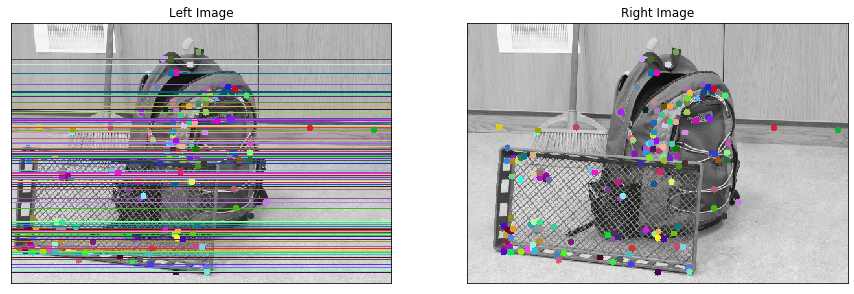

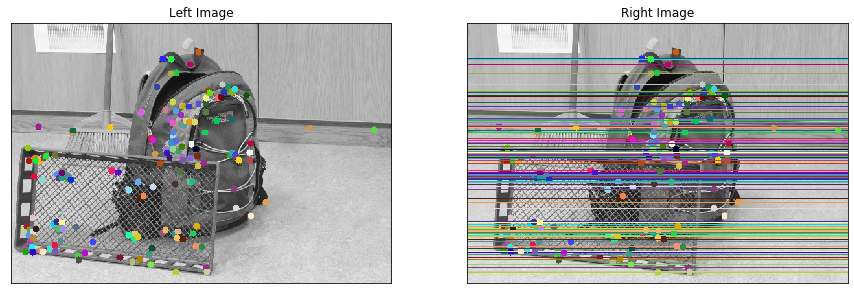

In [39]:
imgR = cv2.imread("im0.png", cv2.IMREAD_GRAYSCALE)
imgL = cv2.imread("im1.png", cv2.IMREAD_GRAYSCALE)

# lower the dimensions of the original image (original image is too large)
newX,newY = imgR.shape[1]*0.2, imgR.shape[0]*0.2
imgR = cv2.resize(imgR,(int(newX),int(newY)))
newX,newY = imgL.shape[1]*0.2, imgL.shape[0]*0.2
imgL = cv2.resize(imgL,(int(newX),int(newY)))

imgr = imgR.copy()
imgl = imgL.copy()

# the fundamental matrix
sift = cv2.xfeatures2d.SIFT_create()
# create a Brute-Force Matcher
bfMatcher = cv2.BFMatcher(cv2.NORM_L2)

# find keypoints and descriptors with SIFT
kpL, desL = sift.detectAndCompute(imgL, None)
kpR, desR = sift.detectAndCompute(imgR, None)

# Now, we want to match keypoints and remove matches on repeatative structure.
# match descriptors (find the best two matches for each descriptor)
matches = bfMatcher.knnMatch(desL, desR, k=2) # query image, train image

# ratio test - store the list of best matches from both images
good = []
ptsL = []
ptsR = []
for i, (m, n) in enumerate(matches):
    if m.distance < 0.6 * n.distance:
        good.append(m)
        ptsR.append(kpR[m.trainIdx].pt)
        ptsL.append(kpL[m.queryIdx].pt)

# find the Fundamental Matrix
ptsL = np.int32(ptsL)
ptsR = np.int32(ptsR)
F, mask = cv2.findFundamentalMat(ptsL, ptsR, cv2.FM_LMEDS) 
# epipolar line in Right image = F ptsL (matrix multiplication)
# epipolar line in Left image = F' ptsR (matrix multiplication)


# Use only inliers for remaining computations
ptsL = ptsL[mask.ravel()==1]
ptsR = ptsR[mask.ravel()==1]

# find epilines
# Epilines corresponding to points in the first image is drawn on the
# second image
linesL = cv2.computeCorrespondEpilines(ptsR, 2, F)
linesL = linesL.reshape(-1, 3)
# draw lines
imgL1, imgR1, y0, y1, x0, x1 = drawlines(imgL, imgR, linesL, ptsL, ptsR)

linesR = cv2.computeCorrespondEpilines(ptsL, 1, F)
linesR = linesR.reshape(-1, 3)
# draw lines
imgR2, imgL2, y0, y1, x0, x1 = drawlines(imgR, imgL, linesR, ptsR, ptsL)

# display images
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(imgL1, cmap="gray")
plt.title("Left Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgR1, cmap="gray")
plt.title("Right Image"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(imgL2, cmap="gray")
plt.title("Left Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgR2, cmap="gray")
plt.title("Right Image"), plt.xticks([]), plt.yticks([])
plt.show()

#### 2.3 Pick any one keypoint in the left image which has a correct match in the right image, and is on the corresponding epipolar line. Extract a patch of size (5 × 5) around this keypoint in the left image.

[ 46 353]


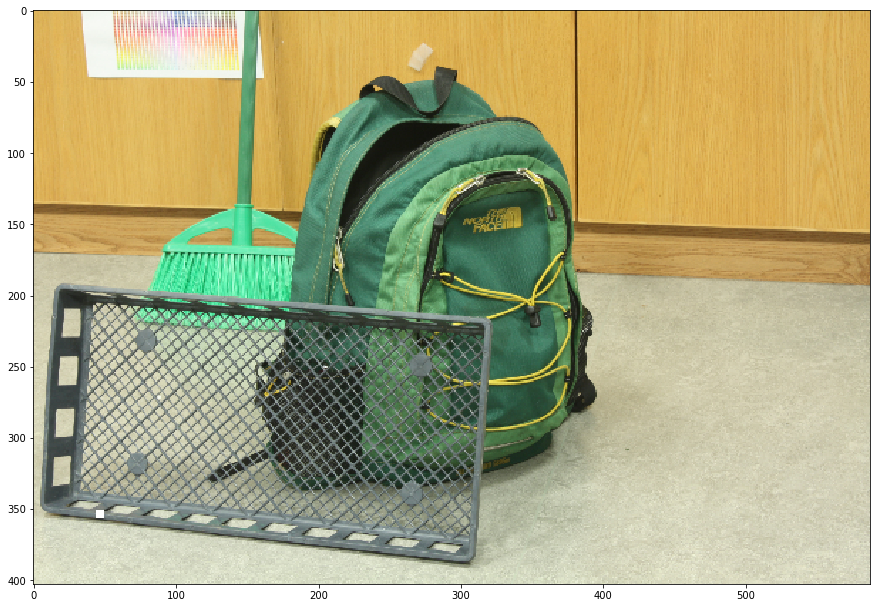

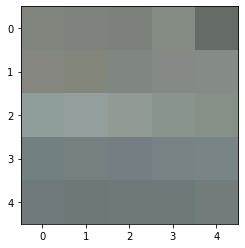

In [40]:
imgl = cv2.cvtColor(cv2.imread("im1.png"), cv2.COLOR_BGR2RGB)
# imgR = cv2.imread("im2.png", cv2.IMREAD_GRAYSCALE)
newX,newY = imgl.shape[1]*0.2, imgl.shape[0]*0.2
imgl = cv2.resize(imgl,(int(newX),int(newY)))
copy = imgl.copy()
point = ptsL[20]
print(point)

window = copy[point[1]-2:point[1]+3, point[0]-2:point[0]+3]

plt.figure(figsize=(10,10))
tmp = cv2.rectangle(imgl, (point[0]-2, point[1]-2), (point[0]+3, point[1]+3), (255,255,255), -1) 
plt.imshow(tmp)
plt.show()

plt.imshow(window)
plt.show()


#### 2.4 Match the extracted patch to every 5 × 5 patch along the corresponding epipolar line in the right image. Use normalized cross correlation metric for matching.

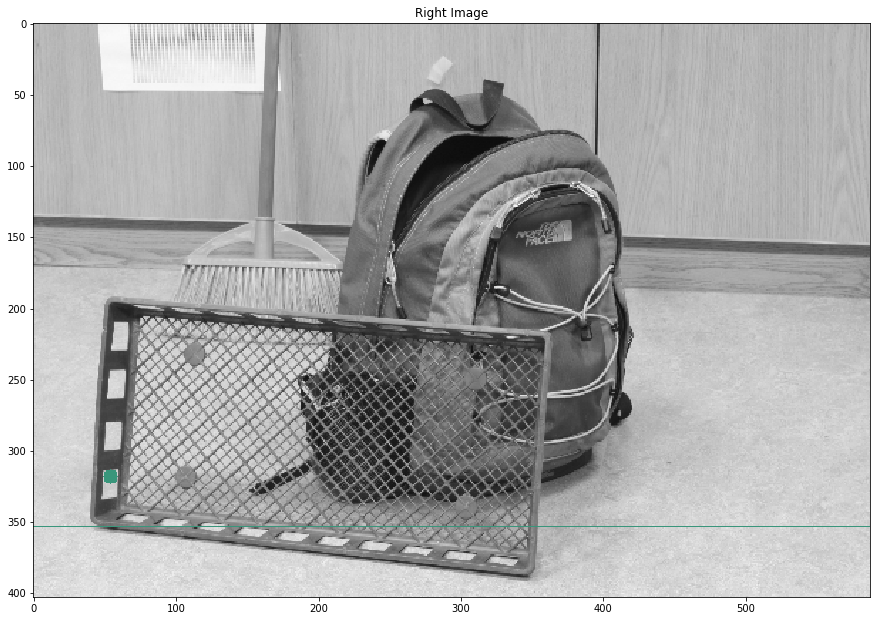

[[-8.7170696e-16  1.0000000e+00 -3.5300000e+02]]
353
353
0 588


In [41]:
imgR = cv2.imread("im0.png", cv2.IMREAD_GRAYSCALE)
imgL = cv2.imread("im1.png", cv2.IMREAD_GRAYSCALE)

# lower the dimensions of the original image (original image is too large)
newX,newY = imgR.shape[1]*0.2, imgR.shape[0]*0.2
imgR = cv2.resize(imgR,(int(newX),int(newY)))
newX,newY = imgL.shape[1]*0.2, imgL.shape[0]*0.2
imgL = cv2.resize(imgL,(int(newX),int(newY)))

right = imgR.copy()

temp = np.reshape(point, (-1,2))
lineR = cv2.computeCorrespondEpilines(temp, 1, F)
lineR = np.reshape(lineR,(-1,3))

imgR2, imgL2, y0, y1, x0, x1 = drawlines(imgR, imgL, lineR, ptsR, ptsL)

plt.figure(figsize=(15,15))
plt.imshow(imgR2, cmap="gray")
plt.title("Right Image")
plt.show()

print(lineR)
print(y0)
print(y1)
print(x0, x1)

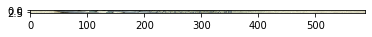

[0]
[80]


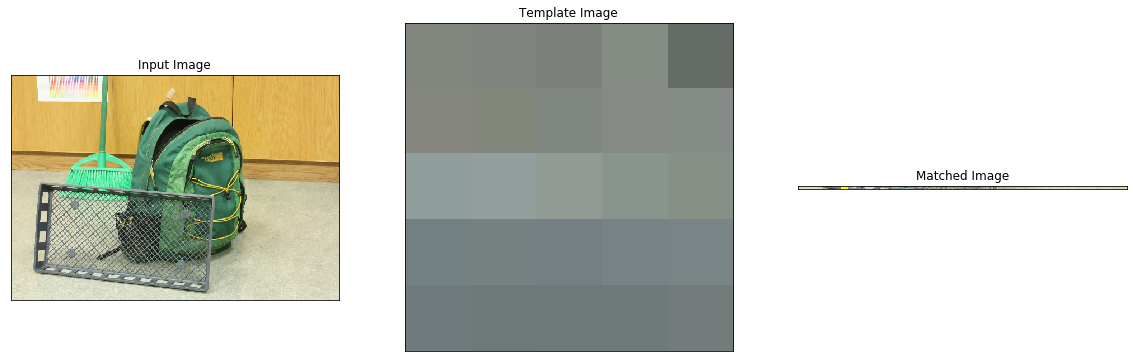

In [42]:
imgR = cv2.imread("im0.png")
newX,newY = imgR.shape[1]*0.2, imgR.shape[0]*0.2
imgR = cv2.resize(imgR,(int(newX),int(newY)))
imgR = cv2.cvtColor(imgR, cv2.COLOR_BGR2RGB)
cropped = imgR[y0-2:y0+3, x0:x1]
plt.imshow(cropped)
plt.show()
img_disp = cropped.copy()

ht, wt = window.shape[0:2]

res = cv2.matchTemplate(cropped, window, cv2.TM_CCOEFF_NORMED)
# print(np.where(res))
# set a threshold (need to tune it)
thres = 0.9
# find all points above threshold
loc = np.where(res >= thres)
index = np.where(res)
print(loc[0])
print(loc[1])


# loop though the points
for pt in zip(*loc[::-1]):
    # print(pt)
    # cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) → None
    cv2.rectangle(img_disp, pt, (pt[0]+wt, pt[1]+ht), (255,255,0), 5)

# display images
plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(imgR)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(window)
plt.title("Template Image"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_disp)
plt.title("Matched Image"), plt.xticks([]), plt.yticks([])
plt.show()

#### 2.5 Plot normalized cross correlation values (on y-axis) against index of the patch in the left image (on x-axis)(refer Lecture 13 slide 57). Find the matching point with maximum normalized cross correlation value. Display found matching points in both the images.

584
584
(0, 80)


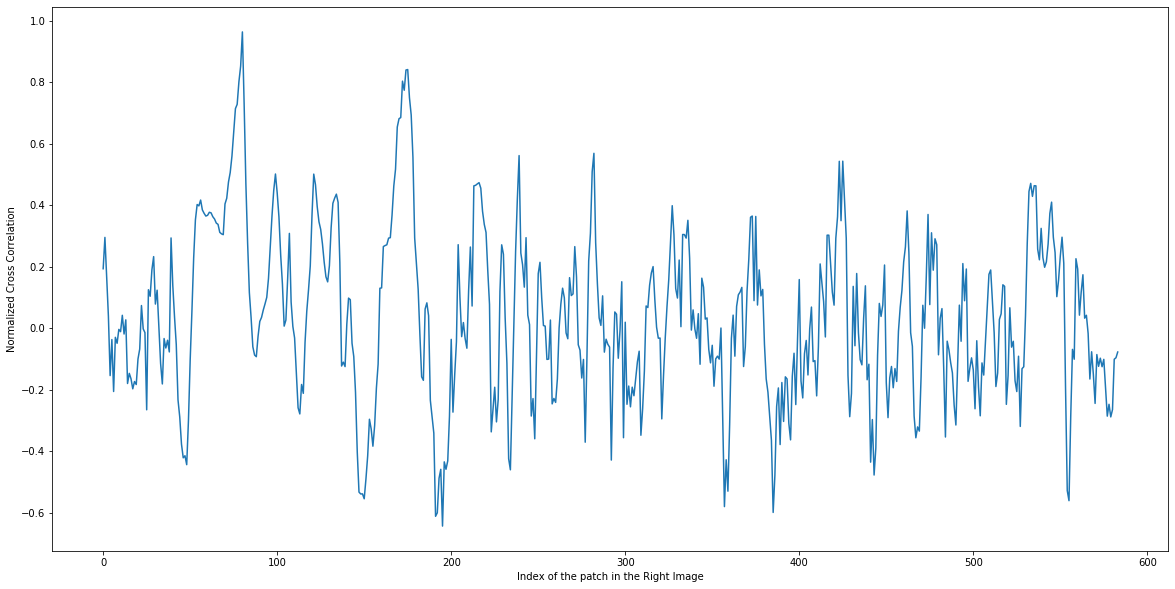

In [43]:
index = np.where(res)
arr = index[1]
res = np.transpose(res)
res = res.tolist()
print(len(res))
print(len(arr))
plt.figure(figsize = (20,10))
plt.plot(arr, res)
plt.xlabel("Index of the patch in the Right Image")
plt.ylabel("Normalized Cross Correlation")

res = np.array(res)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
print(max_loc)

[ 46 353]


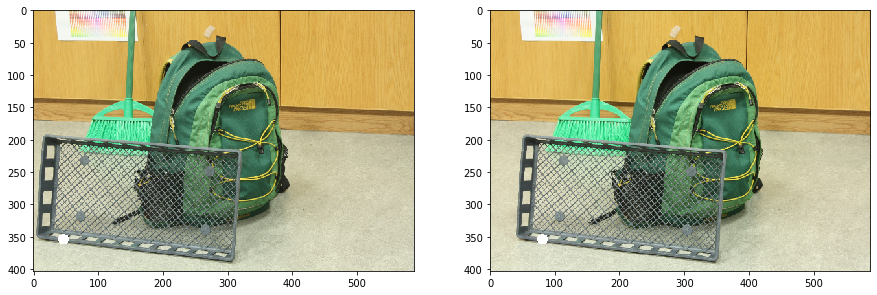

In [13]:
imgl = cv2.cvtColor(cv2.imread("im1.png"), cv2.COLOR_BGR2RGB)
# imgR = cv2.imread("im2.png", cv2.IMREAD_GRAYSCALE)
newX,newY = imgl.shape[1]*0.2, imgl.shape[0]*0.2
imgl = cv2.resize(imgl,(int(newX),int(newY)))

imgr = cv2.cvtColor(cv2.imread("im0.png"), cv2.COLOR_BGR2RGB)
# imgR = cv2.imread("im2.png", cv2.IMREAD_GRAYSCALE)
newX,newY = imgr.shape[1]*0.2, imgr.shape[0]*0.2
imgr = cv2.resize(imgr,(int(newX),int(newY)))

point = ptsL[20]
print(point)

plt.figure(figsize=(15,15))
tmp1 = cv2.rectangle(imgl, (point[0]-2, point[1]-2), (point[0]+3, point[1]+3), (255,255,255), 10) 
plt.subplot(121), plt.imshow(tmp1)
tmp2 = cv2.rectangle(imgr, (max_loc[1]-2, y0-2), (max_loc[1]+3, y0+3), (255,255,255), 10) 
plt.subplot(122), plt.imshow(tmp2)
plt.show()


#### 2.6 Did you find exactly one matching point or multiple matches? Is the matching point you found the correct one? Explain

## 3. Motion Algorithm - Multi-resolution LucasKanade optical flow estimation

#### 3.1 Extract good points to track from ‘frame1.png’ using the Harris corner detector. Use the openCV function goodFeaturesToTrack and set the parameter value maxCorners=500. Search for the optimal values for the parameters qualityLevel, minDistance, blockSize

#### 3.2 Compute the optical flow between ‘frame1.png’ and ‘frame2.png’ for the above detected points. Use the openCV function calcOpticalFlowPyrLK. Set winSize=10, TERM CRITERIA EPS=0.03 and TERM CRITERIA COUNT=10. Experiment with the maximum pyramid level by variying maxLevel parameter from 0 to 10. For each pyramid level, compute the mean of the tracking error returned by calcOpticalFlowPyrLK function for points whose correspondence search is successful. 

#### 3.3 Display the optical flow for each setting of maximum pyramid level. Comment on the quality of the results. 

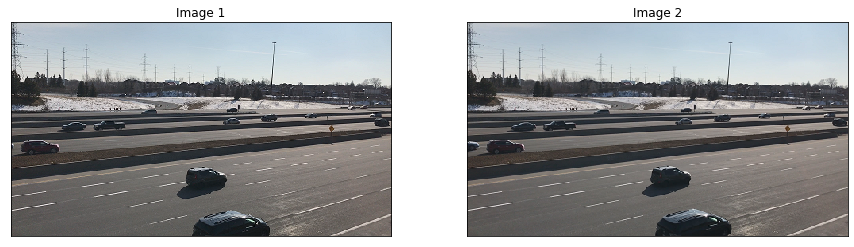

<Figure size 1080x1080 with 0 Axes>

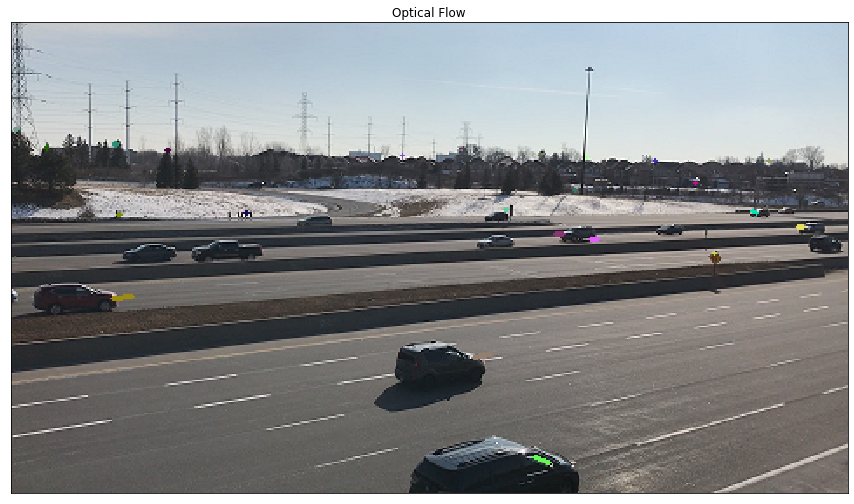

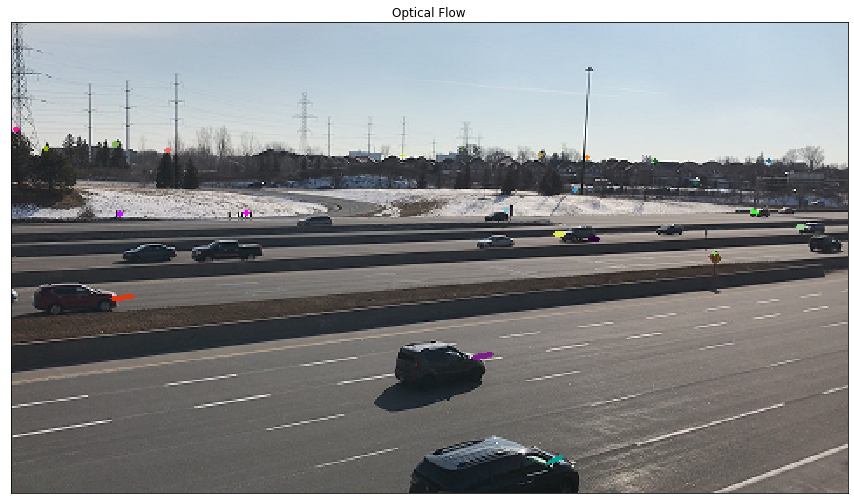

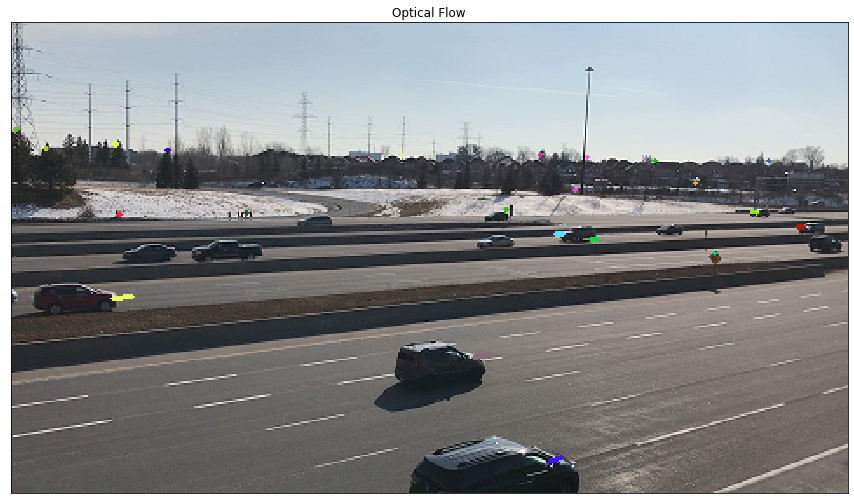

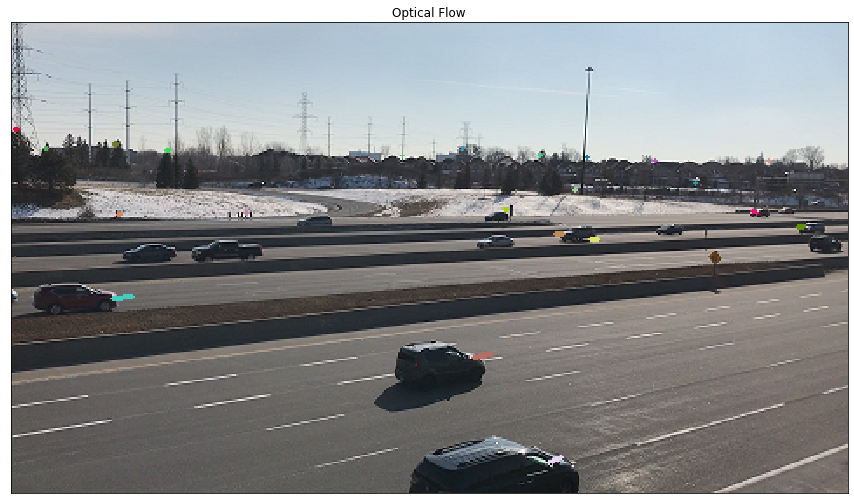

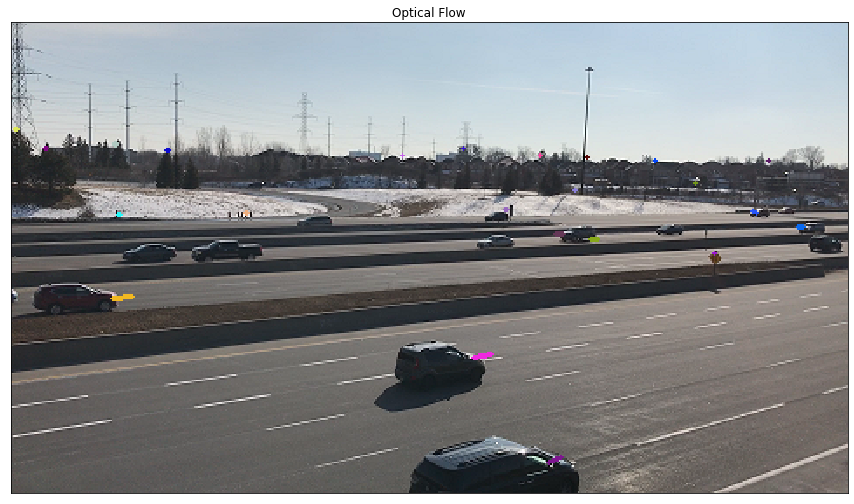

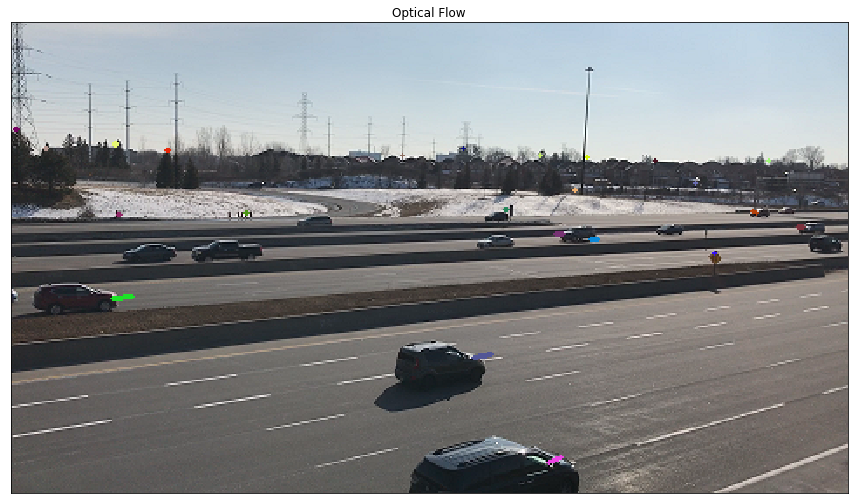

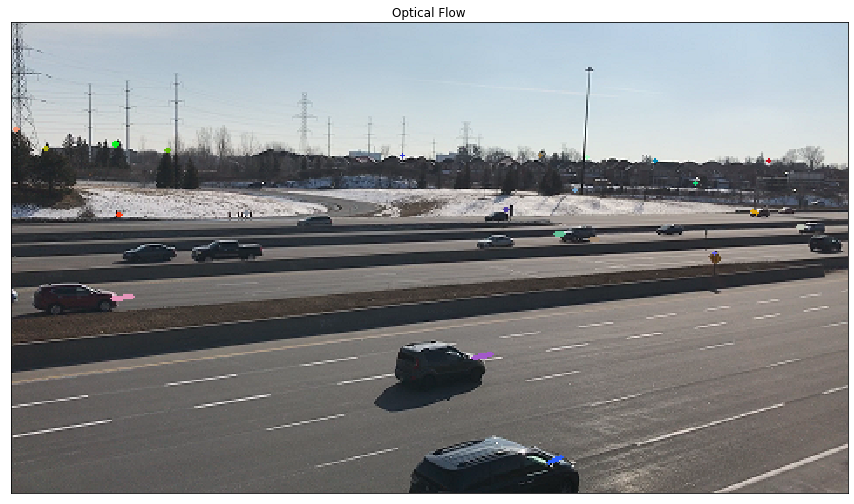

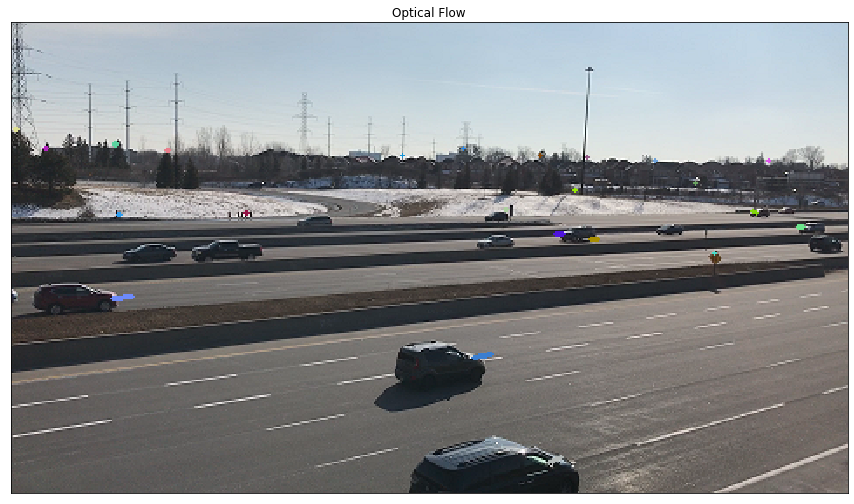

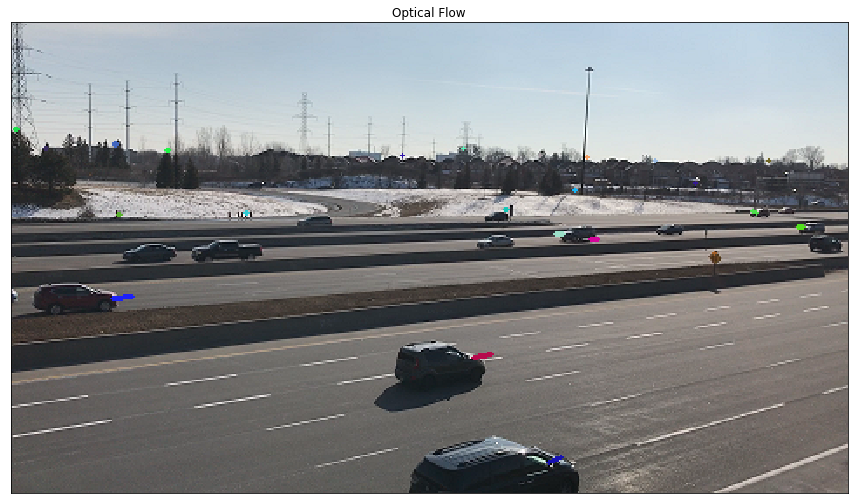

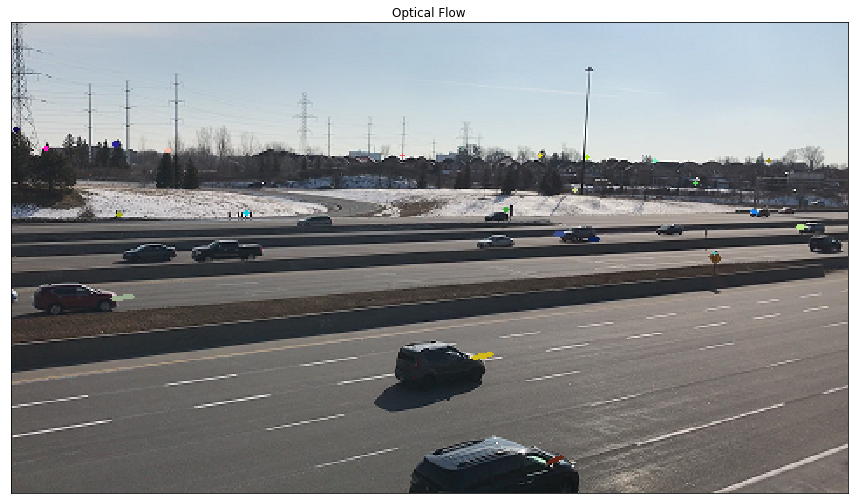

In [47]:
# read images
img1 = cv2.imread("frame1.png")
img2 = cv2.imread("frame2.png")

# convert to grayscale
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

feature_params = dict( maxCorners = 500,
                       qualityLevel = 0.1,
                       minDistance = 20, # 40
                       blockSize = 7 ) # 5
level = []
mean = []

plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Image 1"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Image 2"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(15,15))
    
for x in range(1,11):
# parameters for lucas kanade optical flow
    lk_params = dict( winSize = (10,10),
                      maxLevel = x,
                      criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                                 10, 0.03))

    # find good corners in the first image
    p0 = cv2.goodFeaturesToTrack(img1_gray, **feature_params, useHarrisDetector = True)

    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(img1_gray, img2_gray, p0, None, **lk_params)
    
    # select good points
    good_new = p1[st==1]
    good_old = p0[st==1]
    mean.append(np.mean(err[st==1]))
    level.append(x)
    # create some random colors
    color = np.random.randint(0, 255, (good_new.shape[0], 3))

    # create a mask image for drawing purposes
    mask = img1.copy()

    # draw the tracks
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (a,b), (c,d), color[i].tolist(), 2)

    # display images
    plt.figure(figsize=(15,15))
    plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
    plt.title("Optical Flow"), plt.xticks([]), plt.yticks([])
    plt.show()


#### 3.4 Plot the mean of the error (on y-axis) vs. pyramid level (on x-axis). Discuss the trends you observe in the plot.

[9.6058035, 6.0461164, 6.0450444, 6.0454907, 6.0454907, 6.0454907, 6.0454907, 6.0454907, 6.0454907, 6.0454907]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


Text(0, 0.5, 'Mean of the Error')

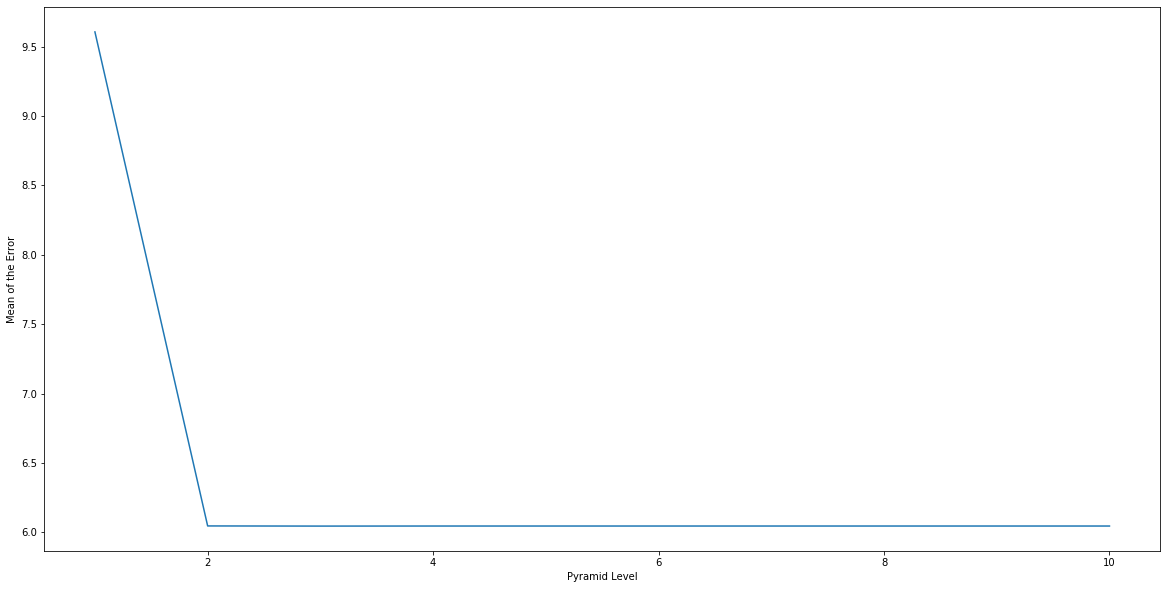

In [44]:
print(mean)
print(level)

plt.figure(figsize = (20,10))
plt.plot(level, mean)
plt.xlabel("Pyramid Level")
plt.ylabel("Mean of the Error")